# Data Massaging II
- Uso avanzado de pandas
- Primeros analisis
- Combinacion de DF
- Funciones lambda aplicadas a DF
- Manejo de datos avanzado

## Agregado de datos

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("../../../Archivos-Analisis/netflix_titles2.csv")
df

In [5]:
# funciones basicas estadisitcas
df.describe()

,release_year,duration_num
count,8807.000000,8807.000000
mean,2014.180198,69.848530
std,8.819312,50.806431
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [ ]:
# En caso de que el DF tenga una columna que no nos sirva
df.drop("Nombre de la columna", axis="columns", inplace=True)

In [6]:
# Obtencion aislada estadisticas
print("Media = ", df["duration_num"].mean())
print("Min = ", df["duration_num"].min())
print("Maxima = ", df["duration_num"].max())

Media =  69.84852957874418
Min =  1.0
Maxima =  312.0


In [8]:
# Agrupacion, ademas de contar el numero de valores
df.groupby("duration_unit").size()

duration_unit
min       6131
season    2676
dtype: int64

<Axes: xlabel='duration_unit'>

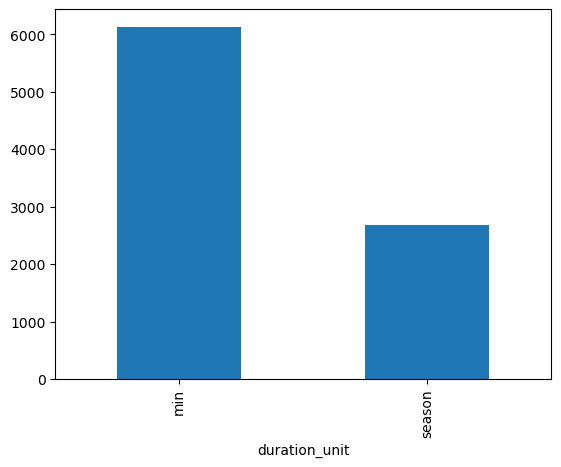

In [10]:
df.groupby("duration_unit").size().plot.bar()

## Calcular el total en horas tanto de peliculas como series
- las peliculas vienen en minutos, por lo que el numero total simplemente se debera de dividir para 60 minutos

In [11]:
# Podemos realizar la suma
movies_minutes = df.loc[df["duration_unit"] == "min", "duration_num"].sum()

# Muestra las estadisticas con 2 decimales
print(f"Total de minutos por pelicula = {movies_minutes:.2f}")
print(f"Total de horas por pelicula = {movies_minutes/60:.2f}")

Total de minutos por pelicula = 610433.00
Total de horas por pelicula = 10173.88


- Las series se tienen que calcular
- Con la cantidad de seasons, se asume que season tiene un promedio de 7 episodios y cada episodio dura 30 min
- Formula : 1 Season = 7 * 30 = 210min

In [12]:
# Largo en minutos
len_season_min = 7 * 30

# Largos de horas de una season
len_season_hr = len_season_min / 60

print(len_season_hr)

3.5


In [13]:
# Calculo del total de seasons del dataset
total_series = df.loc[df["duration_unit"] == "season", "duration_num"].sum()
print("Total de horas en Seasons = ", total_series)

# Ahora se multiplica el total de seasons por el largo de cada season
total_movies_hr = total_series * len_season_hr

print("Total de horas en series = ", total_movies_hr)

Total de horas en Seasons =  4723.0
Total de horas en series =  16530.5


In [14]:
# Las pelculas son mas largas segun su rating?
df[["title","country","release_year","duration_num","rating"]].loc[(df["duration_unit"] == "min")]

,title,country,release_year,duration_num,rating
0,Dick Johnson Is Dead,United States,2020,90.0,PG-13
6,My Little Pony: A New Generation,NaN,2021,91.0,PG
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125.0,TV-MA
9,The Starling,United States,2021,104.0,PG-13
12,Je Suis Karl,"Germany, Czech Republic",2021,127.0,TV-MA
...,...,...,...,...,...
8801,Zinzana,"United Arab Emirates, Jordan",2015,96.0,TV-MA
8802,Zodiac,United States,2007,158.0,R
8804,Zombieland,United States,2009,88.0,R
8805,Zoom,United States,2006,88.0,PG


## Graficacion

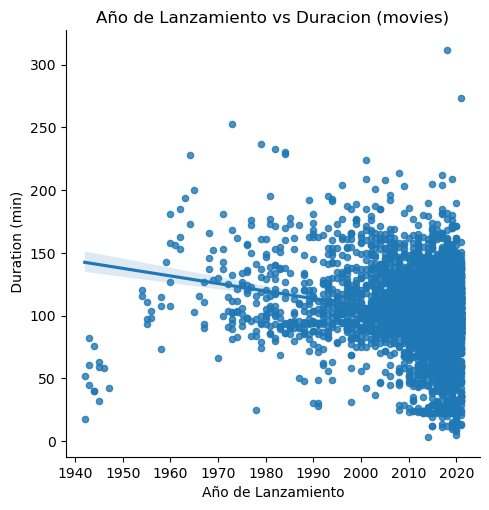

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = df[["title","country","release_year","duration_num","rating"]].loc[(df["duration_unit"] == "min")]
sns.lmplot(x="release_year", y="duration_num", data=df_movies, fit_reg=True, scatter_kws={"marker": "D", "s": 20})

plt.title("Año de Lanzamiento vs Duracion (movies)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel(" Duration (min)")
plt.show()

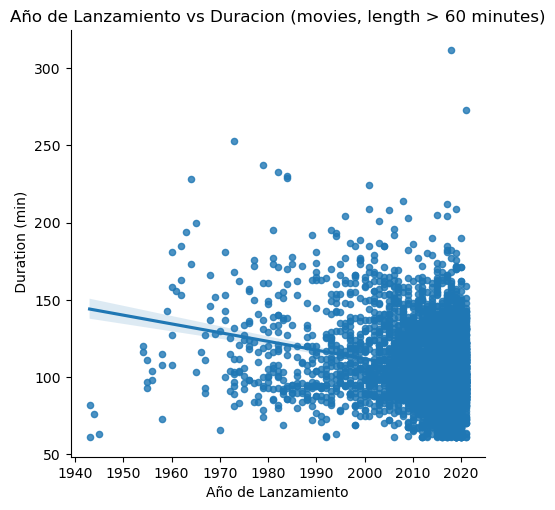

In [25]:
# Que pasaria si es que se toman en cuenta nadas mas las mpeliculas de por lo menos 60 minutos
df_movies2 = df[["title","country","release_year","duration_num","rating"]].loc[(df["duration_unit"] == "min") & (df["duration_num"] > 60)]
sns.lmplot(x="release_year", y="duration_num", data=df_movies2, fit_reg=True, scatter_kws={"marker": "S", "s": 20})

plt.title("Año de Lanzamiento vs Duracion (movies, length > 60 minutes)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel(" Duration (min)")
plt.show()


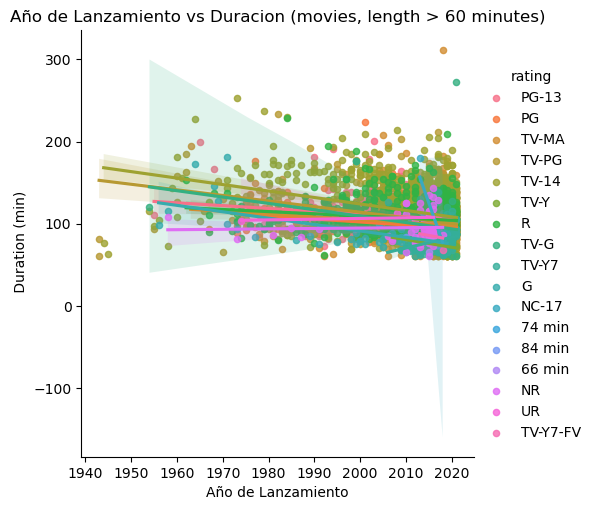

In [26]:
# Respondioendo la pregunta principal
df_movies2 = df[["title","country","release_year","duration_num","rating"]].loc[(df["duration_unit"] == "min") & (df["duration_num"] > 60)]
sns.lmplot(x="release_year", y="duration_num", data=df_movies2, hue="rating",fit_reg=True, scatter_kws={"marker": "S", "s": 20})

plt.title("Año de Lanzamiento vs Duracion (movies, length > 60 minutes)")
plt.xlabel("Año de Lanzamiento")
plt.ylabel(" Duration (min)")
plt.show()

## Agrupaciones y sus graficados

In [27]:
df.groupby("type").count()["show_id"]

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [29]:
# Peliculas por pais
df.groupby("country").count()["show_id"].sort_values(ascending=False)[:10]

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: show_id, dtype: int64

<Axes: xlabel='country'>

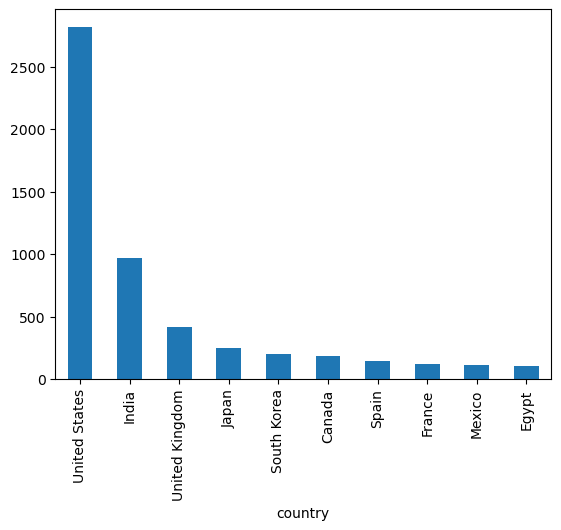

In [30]:
df.groupby("country").count()["show_id"].sort_values(ascending=False)[:10].plot.bar()

<Axes: ylabel='show_id'>

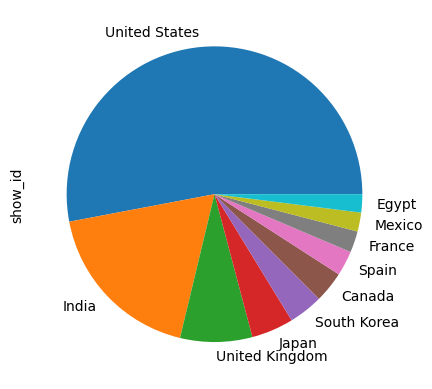

In [31]:
df.groupby("country").count()["show_id"].sort_values(ascending=False)[:10].plot.pie()

In [32]:
# Peliculas por rating
df.groupby("rating").count()["show_id"].sort_values(ascending=False)[:10]

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: show_id, dtype: int64

<Axes: ylabel='show_id'>

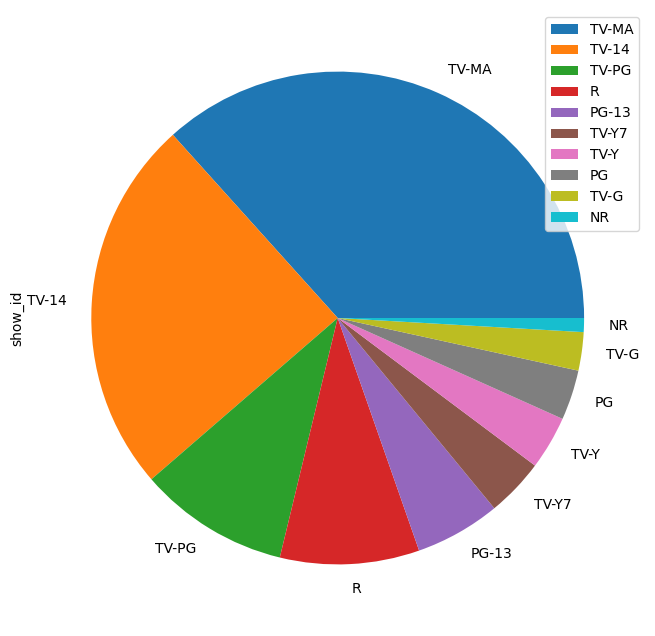

In [33]:
df.groupby("rating").count()["show_id"].sort_values(ascending=False)[:10].plot.pie(y="rating", figsize=(8,8), legend=True)

## Combinacion y Manejo de DF

In [51]:
# Creacion del DF
df_clase = [("Jorge", 22, "MX"),
         ("Julieta", 24, "SP"),
         ("Josselin", 23, "MX"),
         ("Mariana", 20, "COL"),
         ("Esteban", 30, "BR"),
         ("Mike", 33, "MX"),
         ("Carina", 23, "BR"),
         ("Aldo", 23, "EC"),
         ("Omar", 32, "COL"),
         ("Marta", 25, "EC")
         ]

df_clase = pd.DataFrame(df_clase, columns=["Nombre", "Edad", "Pais"],)

In [52]:
df_clase2 = [("Mauricio", 25, "MX"),
          ("Lisset", 41, "PN"),
          ("Aldo", 32, "BR")]
df_clase2 = pd.DataFrame(df_clase2, columns=["Nombre", "Edad", "Pais"],)


### Añadir un DF a otro

In [53]:
df_union = pd.concat([df_clase, df_clase2], axis=0, ignore_index=True)

In [54]:
# Corroboramos
df_union

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,24,SP
2,Josselin,23,MX
3,Mariana,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC


### Reindexacion

In [90]:
# Reinciamos los indices
df_union.reset_index(level=None, drop=True, inplace=True)

In [91]:
df_union

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,24,SP
2,Josselin,23,MX
3,Mariana,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC


### Eliminacion de datos

In [92]:
# Copiamos el Df a un nuevo para eliminar datos no importantes
df_claseEli = df_union

In [93]:
# Eliminamos el registro num 2 del DF
df_claseEli = df_claseEli.drop(2)

In [95]:
df_claseEli

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,24,SP
3,Mariana,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC
10,Mauricio,25,MX


#### Drop con condicion

In [96]:
# Condicion a realziar
df_claseEli[df_claseEli["Edad"] < 25]

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,24,SP
3,Mariana,20,COL
6,Carina,23,BR
7,Aldo,23,EC


In [97]:
# Borraremos las columnas de alumnos que sean menores a "35 años"
df_claseEli.drop(df_claseEli[df_claseEli["Edad"] < 25].index, inplace=True)
df_claseEli

,Nombre,Edad,Pais
4,Esteban,30,BR
5,Mike,33,MX
8,Omar,32,COL
9,Marta,25,EC
10,Mauricio,25,MX
11,Lisset,41,PN
12,Aldo,32,BR


### Actualizacion de datos

In [98]:
df_claseUpd = df_union

In [99]:
# Usamos loc para actualziar
df_claseUpd.loc[3, "Nombre"] = "Ramon"

#### Actualizado con condiciones

In [ ]:
df_claseUpd.loc[(df_union[df_union["Edad"] == 41].index), "Edad"] = 30 # Se actualizo el registro 11
df_claseUpd

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,24,SP
2,Josselin,23,MX
3,Ramon,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,23,BR
7,Aldo,23,EC
8,Omar,32,COL
9,Marta,25,EC


In [104]:
# Condicion
df_claseUpd[df_claseUpd["Edad"] == 23].index

Index([2, 6, 7], dtype='int64')

In [105]:
df_claseUpd.loc[(df_union[df_union["Edad"] == 23].index), "Edad"] = 25 # Se modifican los indices 2, 6 y 7
df_claseUpd

,Nombre,Edad,Pais
0,Jorge,22,MX
1,Julieta,24,SP
2,Josselin,25,MX
3,Ramon,20,COL
4,Esteban,30,BR
5,Mike,33,MX
6,Carina,25,BR
7,Aldo,25,EC
8,Omar,32,COL
9,Marta,25,EC


### Merger de DF

In [110]:
df_clase3 = [("Jorge", 22, "MX"),
         ("Julieta", 24, "SP"),
         ("Josselin", 23, "MX"),
         ("Mariana", 20, "COL"),
         ("Esteban", 30, "BR"),
         ("Mike", 33, "MX"),
         ("Carina", 23, "BR"),
         ("Aldo", 23, "EC"),
         ("Omar", 32, "COL"),
         ("Marta", 25, "EC")
         ]

df_clase3 = pd.DataFrame(df_clase3, columns=["Nombre", "Edad", "Pais"],)

In [112]:
df_clase4 = [("Jorge", 122, "MX"),
         ("Julieta", 124, "SP"),
         ("Josselin", 123, "MX"),
         ("Mariana", 120, "COL")
         ]

df_clase4 = pd.DataFrame(df_clase4, columns=["Nombre", "Edad", "Pais"],)

In [115]:
df_clase3.merge(df_clase4, left_on="Nombre", right_on="Nombre")

,Nombre,Edad_x,Pais_x,Edad_y,Pais_y
0,Jorge,22,MX,122,MX
1,Julieta,24,SP,124,SP
2,Josselin,23,MX,123,MX
3,Mariana,20,COL,120,COL


In [116]:
df_clase3.merge(df_clase4, how="inner", on="Pais")


,Nombre_x,Edad_x,Pais,Nombre_y,Edad_y
0,Jorge,22,MX,Jorge,122
1,Jorge,22,MX,Josselin,123
2,Julieta,24,SP,Julieta,124
3,Josselin,23,MX,Jorge,122
4,Josselin,23,MX,Josselin,123
5,Mariana,20,COL,Mariana,120
6,Mike,33,MX,Jorge,122
7,Mike,33,MX,Josselin,123
8,Omar,32,COL,Mariana,120


#### Producto cartesiano (Convinacion de todos)

In [ ]:
df_clase3.merge(df_clase4, how="cross")

## Lambda con DF

In [2]:
# Creacion del DF
df_class = [("Jorge", 22, "MX"),
         ("Julieta", 24, "SP"),
         ("Josselin", 23, "MX"),
         ("Mariana", 20, "COL"),
         ("Esteban", 30, "BR"),
         ("Mike", 33, "MX"),
         ("Carina", 23, "BR"),
         ("Aldo", 23, "EC"),
         ("Omar", 32, "COL"),
         ("Marta", 25, "EC")
         ]

df_class = pd.DataFrame(df_class, columns=["Nombre", "Edad", "Pais"],)

### Ejemplo 1

In [ ]:
# Primer ejercicio
# Buscar si la edad es par o impar en una nueva columna
df_class["Par-Impar"] = df_class["Edad"].apply(lambda x: "Impar" if int(x) % 2 else " Par")

# En este caso, Edad se envia como parametro a la funcion lambda, que busca si edad / 2 es entero o no

In [4]:
df_class

,Nombre,Edad,Pais,Par-Impar
0,Jorge,22,MX,Par
1,Julieta,24,SP,Par
2,Josselin,23,MX,Impar
3,Mariana,20,COL,Par
4,Esteban,30,BR,Par
5,Mike,33,MX,Impar
6,Carina,23,BR,Impar
7,Aldo,23,EC,Impar
8,Omar,32,COL,Par
9,Marta,25,EC,Impar


In [8]:
df_class.groupby("Par-Impar").count()["Nombre"]

Par-Impar
 Par     5
Impar    5
Name: Nombre, dtype: int64

<Axes: xlabel='Par-Impar'>

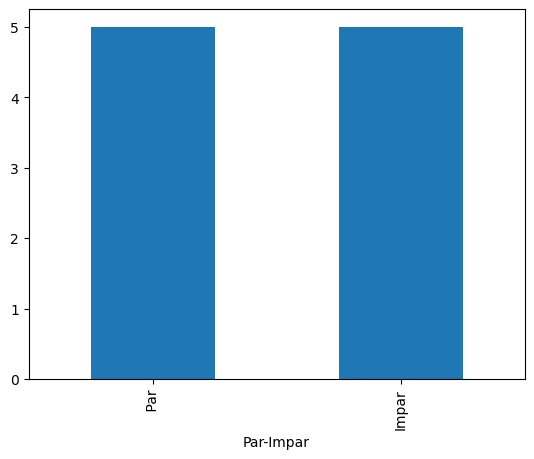

In [6]:
df_class.groupby("Par-Impar").count()["Nombre"].plot.bar()

### Ejemplo 2

In [9]:
# Descuento del 10% para mayores de 30 años
df_class["Dcto"] = df_class["Edad"].apply(lambda x: 0.1 if x > 30 else 0.0)
df_class

,Nombre,Edad,Pais,Par-Impar,Dcto
0,Jorge,22,MX,Par,0.0
1,Julieta,24,SP,Par,0.0
2,Josselin,23,MX,Impar,0.0
3,Mariana,20,COL,Par,0.0
4,Esteban,30,BR,Par,0.0
5,Mike,33,MX,Impar,0.1
6,Carina,23,BR,Impar,0.0
7,Aldo,23,EC,Impar,0.0
8,Omar,32,COL,Par,0.1
9,Marta,25,EC,Impar,0.0


### Ejemplo 3

In [17]:
# Zona horaria
import pytz

df_class["ZonaHoraria"] = df_class["Pais"].apply(lambda x: pytz.country_timezones[x])
df_class

,Nombre,Edad,Pais,Par-Impar,Dcto,ZonaHoraria
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/..."
1,Julieta,24,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta..."
2,Josselin,23,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/..."
3,Mariana,20,CO,Par,0.0,[America/Bogota]
4,Esteban,30,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta..."
5,Mike,33,MX,Impar,0.1,"[America/Mexico_City, America/Cancun, America/..."
6,Carina,23,BR,Impar,0.0,"[America/Noronha, America/Belem, America/Forta..."
7,Aldo,23,EC,Impar,0.0,"[America/Guayaquil, Pacific/Galapagos]"
8,Omar,32,CO,Par,0.1,[America/Bogota]
9,Marta,25,EC,Impar,0.0,"[America/Guayaquil, Pacific/Galapagos]"


### Ejemplo 4

In [18]:
# Obtenemos la capital de cada pais, en el caso de que se tenga que generar comunicados o envios fisicos
df_class["NombrePais"] = df_class["Pais"].apply(lambda x: pytz.country_names[x])
df_class

,Nombre,Edad,Pais,Par-Impar,Dcto,ZonaHoraria,NombrePais
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico
1,Julieta,24,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil
2,Josselin,23,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico
3,Mariana,20,CO,Par,0.0,[America/Bogota],Colombia
4,Esteban,30,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil
5,Mike,33,MX,Impar,0.1,"[America/Mexico_City, America/Cancun, America/...",Mexico
6,Carina,23,BR,Impar,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil
7,Aldo,23,EC,Impar,0.0,"[America/Guayaquil, Pacific/Galapagos]",Ecuador
8,Omar,32,CO,Par,0.1,[America/Bogota],Colombia
9,Marta,25,EC,Impar,0.0,"[America/Guayaquil, Pacific/Galapagos]",Ecuador


In [20]:
# En base a lo anterior, obtendremos la capital del pais mediante la libreria CountryInfo
# Instalamos la libreria con: pip install countryinfo
from countryinfo import CountryInfo
df_class["Capital"] = df_class["NombrePais"].apply(lambda x: CountryInfo(x).capital())
df_class

,Nombre,Edad,Pais,Par-Impar,Dcto,ZonaHoraria,NombrePais,Capital
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
1,Julieta,24,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil,Brasília
2,Josselin,23,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
3,Mariana,20,CO,Par,0.0,[America/Bogota],Colombia,Bogotá
4,Esteban,30,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil,Brasília
5,Mike,33,MX,Impar,0.1,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
6,Carina,23,BR,Impar,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil,Brasília
7,Aldo,23,EC,Impar,0.0,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito
8,Omar,32,CO,Par,0.1,[America/Bogota],Colombia,Bogotá
9,Marta,25,EC,Impar,0.0,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito


### Ejercicio

In [ ]:
# Imaginemos que se abre un curso en portugues, por lo que los alumnos de Braisl tienen que salir del listado actual
index_br = df_class[(df_class["Pais"] == "BR")].index
index_br

Index([1, 4, 6], dtype='int64')

In [22]:
# Eliminamos a los alumnos del listado
df_class.drop(index_br, inplace=True)
df_class

,Nombre,Edad,Pais,Par-Impar,Dcto,ZonaHoraria,NombrePais,Capital
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
2,Josselin,23,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
3,Mariana,20,CO,Par,0.0,[America/Bogota],Colombia,Bogotá
5,Mike,33,MX,Impar,0.1,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
7,Aldo,23,EC,Impar,0.0,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito
8,Omar,32,CO,Par,0.1,[America/Bogota],Colombia,Bogotá
9,Marta,25,EC,Impar,0.0,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito


In [27]:
#
print(df_class.groupby("Pais").size())

Pais
CO    2
EC    2
MX    3
dtype: int64


# Bonus

In [28]:
import seaborn as sns

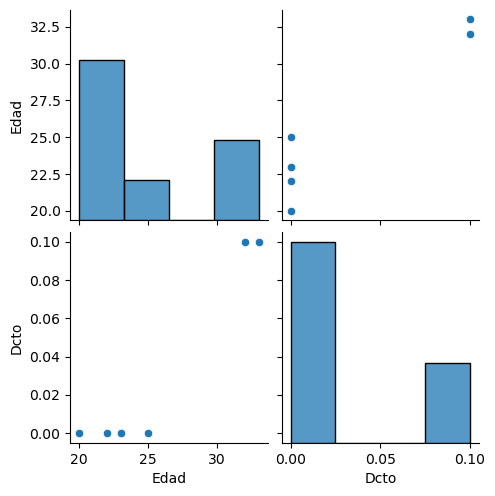

In [29]:
# Graficacion tipo pairplot
sns.pairplot(df_class)

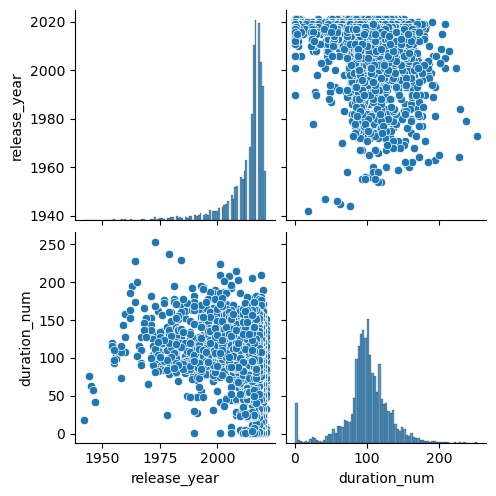

In [31]:
# Graficado para el CSV de epliculas

# Eliminaciond e los nulos
df.dropna(inplace=True)

# Eliminacion de duplicados
df.drop_duplicates(inplace=True)

# Visualizaicon
sns.pairplot(df)